In [75]:
import netCDF4
import itertools

from tqdm import tqdm

Nx = 512
Ny = 512
Na = 5

def tau_1(arr, tau, counter):
    
    arr_tau_1 = np.zeros((Nx, Ny))
    
    for i, j in tqdm(itertools.product(range(Nx), range(Ny)), desc = str(counter)):
        
        idx_tau_1 = np.argmin(abs(tau[:, j, i] - 1.0))
        
        arr_tau_1[i, j] = arr[idx_tau_1, j, i]
        
    return arr_tau_1

mu_id = ['10', '8', '6', '4', '2']

T_ssd = np.zeros((Na, Nx, Ny))
p_ssd = np.zeros((Na, Nx, Ny))
d_ssd = np.zeros((Na, Nx, Ny))
t_ssd = np.zeros((Na, Nx, Ny))

T_300 = np.zeros((Na, Nx, Ny))
p_300 = np.zeros((Na, Nx, Ny))
d_300 = np.zeros((Na, Nx, Ny))
t_300 = np.zeros((Na, Nx, Ny))

for i in range(Na):
    
    k = 6 * i
    
    T = np.array(netCDF4.Dataset('./ssd/222809/' + mu_id[i] + '/T_onTau.222809.nc.1')['T'])
    p = np.array(netCDF4.Dataset('./ssd/222809/' + mu_id[i] + '/P_onTau.222809.nc.1')['P'])
    d = np.array(netCDF4.Dataset('./ssd/222809/' + mu_id[i] + '/rho_onTau.222809.nc.1')['R'])
    t = np.array(netCDF4.Dataset('./ssd/222809/' + mu_id[i] + '/taugrid.222809.nc.1')['tau'])
    
    T_ssd[i, :, :] = tau_1(T, t, k + 1)
    p_ssd[i, :, :] = tau_1(p, t, k + 2)
    d_ssd[i, :, :] = tau_1(d, t, k + 3)

    T = np.array(netCDF4.Dataset('./300G/627321/' + mu_id[i] + '/T_onTau.627321.nc.1')['T'])
    p = np.array(netCDF4.Dataset('./300G/627321/' + mu_id[i] + '/P_onTau.627321.nc.1')['P'])
    d = np.array(netCDF4.Dataset('./300G/627321/' + mu_id[i] + '/rho_onTau.627321.nc.1')['R'])
    t = np.array(netCDF4.Dataset('./300G/627321/' + mu_id[i] + '/taugrid.627321.nc.1')['tau'])
    
    T_300[i, :, :] = tau_1(T, t, k + 4)
    p_300[i, :, :] = tau_1(p, t, k + 5)
    d_300[i, :, :] = tau_1(d, t, k + 6)

np.savez('ssd',  T = T_ssd, p = p_ssd, d = d_ssd)
np.savez('300G', T = T_300, p = p_300, d = d_300)

1: 262144it [00:06, 41256.70it/s]
2: 262144it [00:05, 47094.59it/s]
3: 262144it [00:05, 45179.26it/s]
4: 262144it [00:05, 48396.38it/s]
5: 262144it [00:05, 47088.23it/s]
6: 262144it [00:06, 43088.86it/s]
7: 262144it [00:05, 48211.05it/s]
8: 262144it [00:05, 50322.88it/s]
9: 262144it [00:05, 50471.38it/s]
10: 262144it [00:05, 50486.58it/s]
11: 262144it [00:05, 50439.62it/s]
12: 262144it [00:05, 50468.05it/s]
13: 262144it [00:05, 50741.93it/s]
14: 262144it [00:05, 49201.15it/s]
15: 262144it [00:05, 49762.65it/s]
16: 262144it [00:05, 50766.23it/s]
17: 262144it [00:05, 50615.06it/s]
18: 262144it [00:05, 48418.71it/s]
19: 262144it [00:05, 50623.58it/s]
20: 262144it [00:05, 50644.80it/s]
21: 262144it [00:05, 50706.23it/s]
22: 262144it [00:05, 50655.35it/s]
23: 262144it [00:05, 50558.90it/s]
24: 262144it [00:05, 50426.78it/s]
25: 262144it [00:05, 49140.83it/s]
26: 262144it [00:05, 45064.71it/s]
27: 262144it [00:05, 46104.40it/s]
28: 262144it [00:05, 50156.90it/s]
29: 262144it [00:05, 47227.38

In [1]:
T_ssd = np.load('ssd.npz')['T']
p_ssd = np.load('ssd.npz')['p']
d_ssd = np.load('ssd.npz')['d']

T_300 = np.load('300G.npz')['T']
p_300 = np.load('300G.npz')['p']
d_300 = np.load('300G.npz')['d']

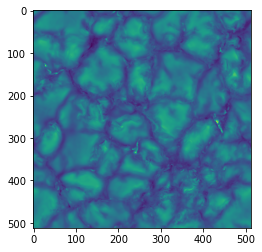

In [4]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

import matplotlib.colors as colors

from  matplotlib.colors import LogNorm

props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.5)

plt.rcParams.update({'font.size': 8})
plt.rcParams["font.family"] = 'Times New Roman'

colormap1 = 'hot'
colormap2 = 'xxx'
colormap3 = 'yyy'

mus = ['1.0', '0.8', '0.6', '0.4', '0.2']
    
plt.close('all')

fig = plt.figure(dpi = 300)

fig.set_size_inches(10, 4.5, forward = True)

fig.tight_layout()

gs = gridspec.GridSpec(3, 11, width_ratios = [0.05, 1, 0.8, 0.6, 0.4, 0.2, 1, 0.8, 0.6, 0.4, 0.2], hspace = 0.03, wspace = 0.05)

temp_cbar = plt.subplot(gs[0, 0])
pres_cbar = plt.subplot(gs[1, 0])
dens_cbar = plt.subplot(gs[2, 0])
    
#    for i in range(1, 6):

#        Is_rat[i - 1, :, :] = Is_nlt[i - 1, :, :, j] / Is_lte[i - 1, :, :, j]
#        I3_rat[i - 1, :, :] = I3_nlt[i - 1, :, :, j] / I3_lte[i - 1, :, :, j]
        
#    rmin = min(np.percentile(Is_rat, 5), np.percentile(I3_rat, 5))
#    rmax = max(np.percentile(Is_rat, 95), np.percentile(I3_rat, 95))
    
#    lmin = min(np.percentile(Is_lte[:, :, :, j], 5), np.percentile(I3_lte[:, :, :, j], 5))
#    lmax = max(np.percentile(Is_lte[:, :, :, j], 95), np.percentile(I3_lte[:, :, :, j], 95))
    
#    nmin = min(np.percentile(Is_nlt[:, :, :, j], 5), np.percentile(I3_nlt[:, :, :, j], 5))
#    nmax = max(np.percentile(Is_nlt[:, :, :, j], 95), np.percentile(I3_nlt[:, :, :, j], 95))
    
#    imin = min(lmin, nmin)
#    imax = max(lmax, nmax)

for i in range(1, 6):

#------------------------------------------
# settings for SSD

    ssd_lte = plt.subplot(gs[0, i])
    ssd_nlt = plt.subplot(gs[1, i])
        
    ssd_rat = plt.subplot(gs[2, i])
        
    if i == 2: ssd_lte.text(300, 600, 'SSD', fontsize = 10, verticalalignment = 'top', bbox = props)
    if i == 4: ssd_lte.text(400, 600, r'$\lambda = $' + str(w[j]) + ' nm', fontsize = 10, verticalalignment = 'top', bbox = props)

    ssd_lte.set_xlim(0, 511)
    ssd_lte.set_ylim(0, 511)

    ssd_nlt.set_xlim(0, 511)
    ssd_nlt.set_ylim(0, 511)
        
    ssd_rat.set_xlim(0, 511)
    ssd_rat.set_ylim(0, 511)

    ssd_lte.xaxis.set_ticklabels([])
    ssd_lte.yaxis.set_ticklabels([])
        
    ssd_nlt.xaxis.set_ticklabels([])
    ssd_nlt.yaxis.set_ticklabels([])
        
    ssd_rat.xaxis.set_ticklabels([])
    ssd_rat.yaxis.set_ticklabels([])
        
    ssd_lte.xaxis.set_ticks([])
    ssd_lte.yaxis.set_ticks([])
    
    ssd_nlt.xaxis.set_ticks([])
    ssd_nlt.yaxis.set_ticks([])
        
    ssd_rat.xaxis.set_ticks([])
    ssd_rat.yaxis.set_ticks([])

#------------------------------------------
# settings for 300G

    mag_lte = plt.subplot(gs[0, 5 + i])
    mag_nlt = plt.subplot(gs[1, 5 + i])
        
    mag_rat = plt.subplot(gs[2, 5 + i])
        
    if i == 2: mag_lte.text(200, 600, '300G', fontsize = 10, verticalalignment = 'top', bbox = props)

    mag_lte.set_xlim(0, 511)
    mag_lte.set_ylim(0, 511)

    mag_nlt.set_xlim(0, 511)
    mag_nlt.set_ylim(0, 511)
        
    mag_rat.set_xlim(0, 511)
    mag_rat.set_ylim(0, 511)

    mag_lte.xaxis.set_ticklabels([])
    mag_lte.yaxis.set_ticklabels([])
        
    mag_nlt.xaxis.set_ticklabels([])
    mag_nlt.yaxis.set_ticklabels([])
        
    mag_rat.xaxis.set_ticklabels([])
    mag_rat.yaxis.set_ticklabels([])
        
    mag_lte.xaxis.set_ticks([])
    mag_lte.yaxis.set_ticks([])
    
    mag_nlt.xaxis.set_ticks([])
    mag_nlt.yaxis.set_ticks([])
        
    mag_rat.xaxis.set_ticks([])
    mag_rat.yaxis.set_ticks([])
        
#----------------------------------------------
        
    lonorm = colors.LogNorm(vmin = imin, vmax = imax)
        
    if j == 7: mpnorm = MidPointLogNorm(vmin = rmin, vmax = rmax, midpoint = 1)
    if j != 7: mpnorm = colors.TwoSlopeNorm(vmin = rmin, vmax = rmax, vcenter = 1)
    
    ssd_lte_img = ssd_lte.imshow(Is_lte[i - 1, :, :, j], cmap = colormap1, norm = lonorm, aspect = 'auto')
    ssd_nlt_img = ssd_nlt.imshow(Is_nlt[i - 1, :, :, j], cmap = colormap1, norm = lonorm, aspect = 'auto')
    ssd_rat_img = ssd_rat.imshow(Is_rat[i - 1, :, :],    cmap = colormap2, norm = mpnorm, aspect = 'auto')
        
    mag_lte_img = mag_lte.imshow(I3_lte[i - 1, :, :, j], cmap = colormap1, norm = lonorm, aspect = 'auto')
    mag_nlt_img = mag_nlt.imshow(I3_nlt[i - 1, :, :, j], cmap = colormap1, norm = lonorm, aspect = 'auto')
    mag_rat_img = mag_rat.imshow(I3_rat[i - 1, :, :],    cmap = colormap2, norm = mpnorm, aspect = 'auto')
    
    int_cb = Colorbar(ax = int_cbar, mappable = ssd_lte_img, orientation = 'vertical', ticklocation = 'left')
    rat_cb = Colorbar(ax = rat_cbar, mappable = ssd_rat_img, orientation = 'vertical', ticklocation = 'left')
        
    ssd_rat.set_xlabel(r'$\mu = $' + mus[i - 1], fontsize = 5)
    mag_rat.set_xlabel(r'$\mu = $' + mus[i - 1], fontsize = 5)
    
    if i == 5:
            
        mag_lte.set_ylabel('LTE')
        mag_nlt.set_ylabel('NLTE')
            
        mag_lte.yaxis.set_label_position("right")
        mag_nlt.yaxis.set_label_position("right")
        
int_cb.set_label('Intensity, cgs', labelpad = 5)
rat_cb.set_label(r'$I_\mathrm{NLTE} / I_\mathrm{LTE}$', labelpad = 5)

plt.savefig('intro.pdf', bbox_inches = 'tight')